#  Use pandas_datareader

In [1]:
from pandas_datareader import data

# Fetch daily data for 4 years
symbols=['AAPL', 'AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']

start_date = '2010-01-01'
end_date = '2021-12-31'

df = data.DataReader(symbols, 'yahoo', start_date, end_date)['Adj Close']
df.head(3)

Symbols,AAPL,AMZN,GOOGL,FB,MCD,GM,TSLA,PFE
Date,,,,,,,,
2010-01-04,6.535086,6.6950,313.688690,NaN,43.956017,NaN,NaN,11.310513
2010-01-05,6.546383,6.7345,312.307312,NaN,43.619930,NaN,NaN,11.149196
2010-01-06,6.442255,6.6125,304.434448,NaN,43.024799,NaN,NaN,11.113346


In [2]:
df.shape

(3132, 8)

<AxesSubplot:xlabel='Date'>

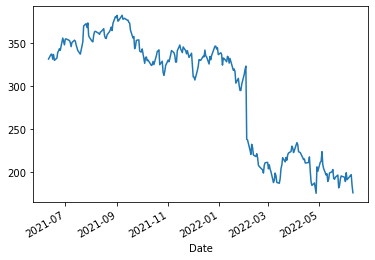

In [3]:
df.FB.plot()

# Convert into Rate of Returns

In [4]:
returns=(df-df.shift(1))/df.shift(1)

In [5]:
returns.dropna(inplace=True)

In [6]:
returns.head(5)

Symbols,AAPL,AMZN,GOOGL,FB,MCD,GM,TSLA,PFE
Date,,,,,,,,
2021-06-14,0.024578,0.011067,0.007699,0.016633,0.000211,-0.011384,0.012789,-0.012951
2021-06-15,-0.006438,-0.000219,-0.008379,-0.000059,-0.002658,0.000329,-0.029675,-0.001009
2021-06-16,0.003934,0.009494,-0.005329,-0.016837,-0.003258,0.015622,0.009193,-0.007325
2021-06-17,0.012601,0.021665,0.008040,0.016401,-0.007216,-0.027202,0.019393,0.004580
2021-06-18,-0.010092,-0.000671,-0.013409,-0.020356,-0.018215,-0.021971,0.010882,-0.016971


### Or simply use the pct_change() function

In [7]:
df.pct_change().dropna().head(5)

Symbols,AAPL,AMZN,GOOGL,FB,MCD,GM,TSLA,PFE
Date,,,,,,,,
2021-06-14,0.024578,0.011067,0.007699,0.016633,0.000211,-0.011384,0.012789,-0.012951
2021-06-15,-0.006438,-0.000219,-0.008379,-0.000059,-0.002658,0.000329,-0.029675,-0.001009
2021-06-16,0.003934,0.009494,-0.005329,-0.016837,-0.003258,0.015622,0.009193,-0.007325
2021-06-17,0.012601,0.021665,0.008040,0.016401,-0.007216,-0.027202,0.019393,0.004580
2021-06-18,-0.010092,-0.000671,-0.013409,-0.020356,-0.018215,-0.021971,0.010882,-0.016971


## Summary Statistic

In [8]:
returns.describe().round(4)

Symbols,AAPL,AMZN,GOOGL,FB,MCD,GM,TSLA,PFE
count,141.0000,141.0000,141.0000,141.0000,141.0000,141.0000,141.0000,141.0000
mean,0.0025,0.0001,0.0013,0.0003,0.0010,-0.0001,0.0043,0.0031
std,0.0138,0.0152,0.0131,0.0179,0.0091,0.0225,0.0294,0.0200
min,-0.0393,-0.0756,-0.0372,-0.0505,-0.0276,-0.0891,-0.1199,-0.0514
25%,-0.0056,-0.0084,-0.0057,-0.0109,-0.0045,-0.0124,-0.0091,-0.0074
50%,0.0023,-0.0002,0.0017,0.0001,0.0019,-0.0004,0.0033,0.0002
75%,0.0120,0.0095,0.0083,0.0128,0.0071,0.0139,0.0191,0.0106
max,0.0354,0.0469,0.0496,0.0530,0.0267,0.0602,0.1266,0.1086


In [9]:
returns.skew()

Symbols
AAPL    -0.197383
AMZN    -0.596442
GOOGL    0.102472
FB      -0.258731
MCD     -0.144045
GM      -0.375835
TSLA    -0.006256
PFE      1.341990
dtype: float64

In [10]:
returns.kurt()

Symbols
AAPL     0.351655
AMZN     4.205716
GOOGL    1.371994
FB       0.767980
MCD      0.728649
GM       1.803911
TSLA     3.680910
PFE      5.520281
dtype: float64

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [11, 5]
plt.rcParams["figure.autolayout"] = True

import seaborn as sns
import pandas as pd
import numpy as np

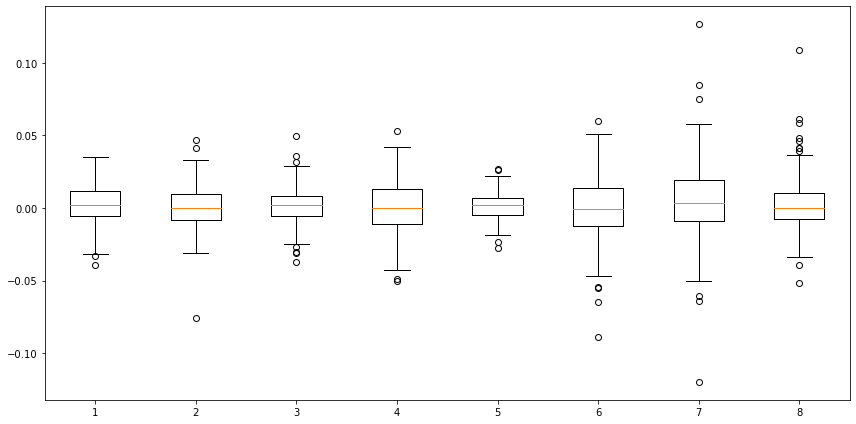

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plt.boxplot(returns)
plt.tight_layout()

### Histogram 

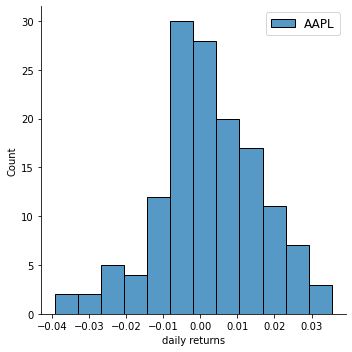

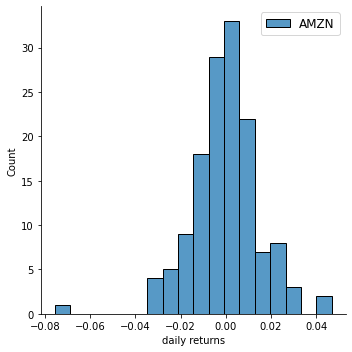

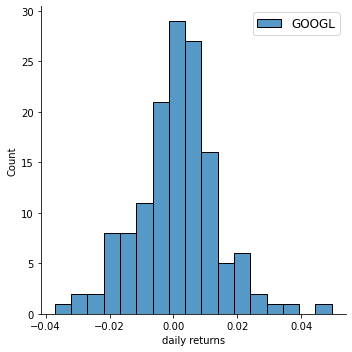

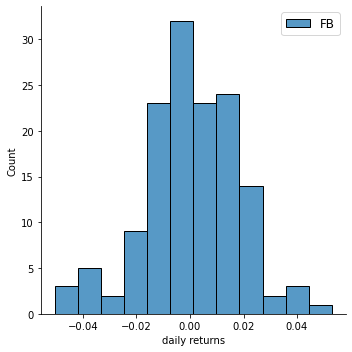

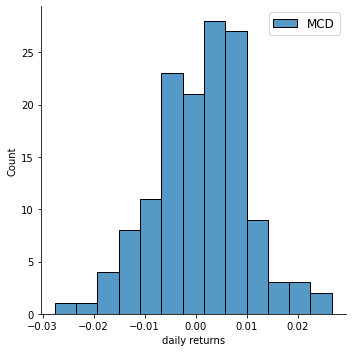

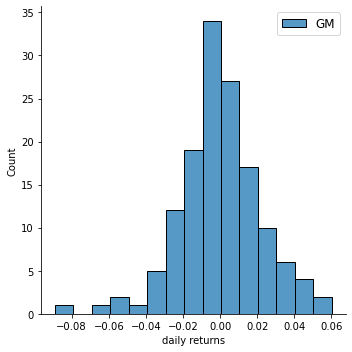

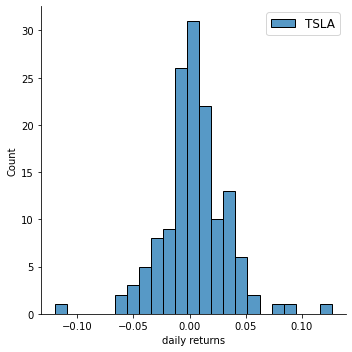

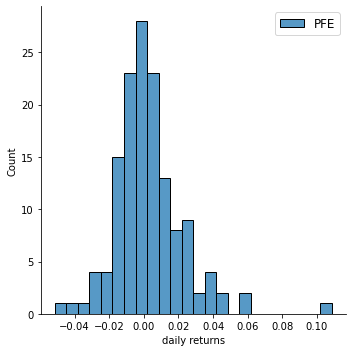

In [13]:
for sym in returns.columns.values:
    sns.displot(returns[sym], kind='hist', label=sym)
    plt.legend(loc='upper right', fontsize=12)
    plt.xlabel('daily returns')
    plt.show()

### Density plot

In [14]:
for sym in returns.columns.values:
    sns.displot(returns[sym], kde=True, label=sym)
    plt.legend(loc='upper right', fontsize=12)
    plt.xlabel('daily returns')
import     plt.show()

SyntaxError: invalid syntax (<ipython-input-14-33ad79d7cb16>, line 5)

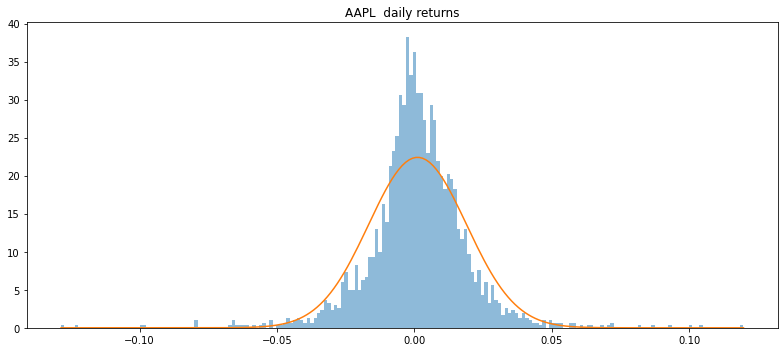

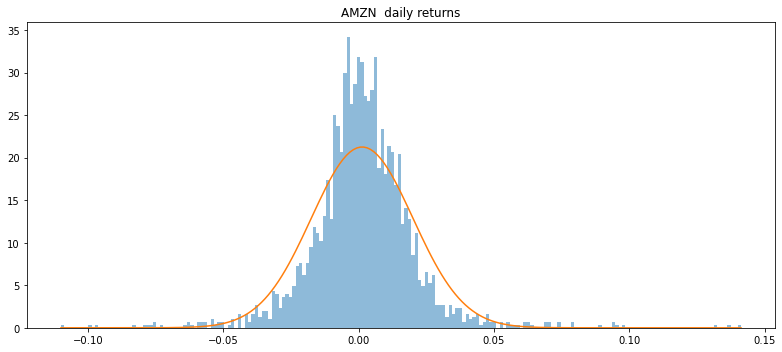

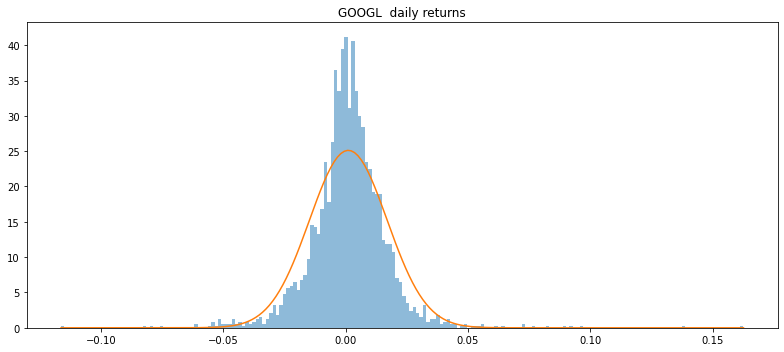

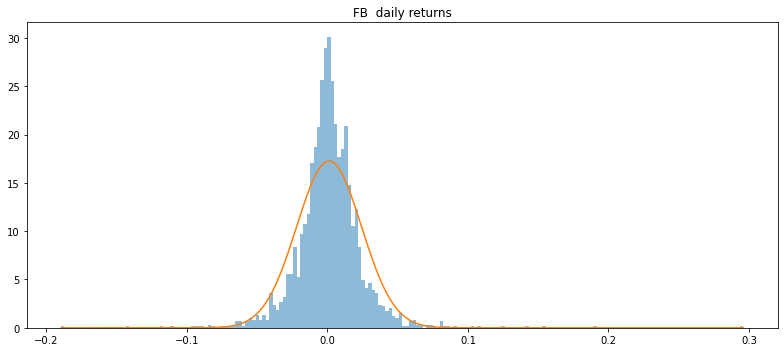

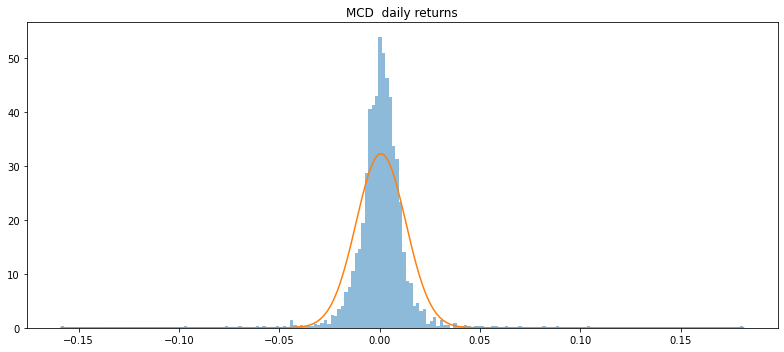

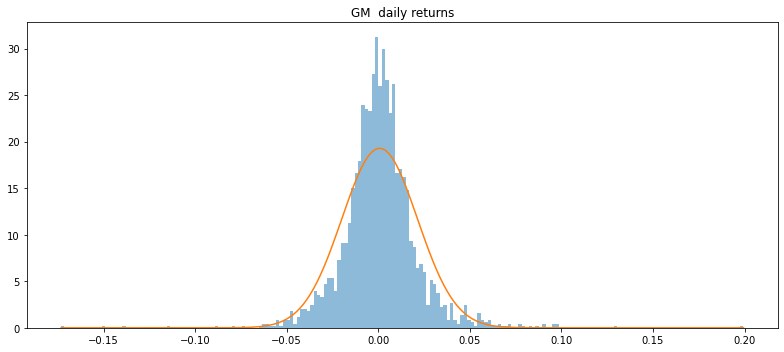

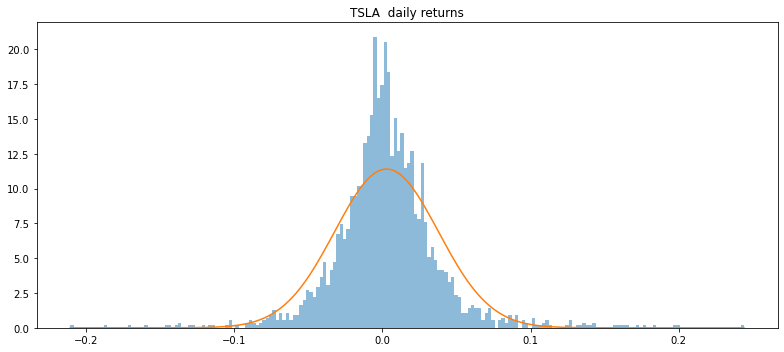

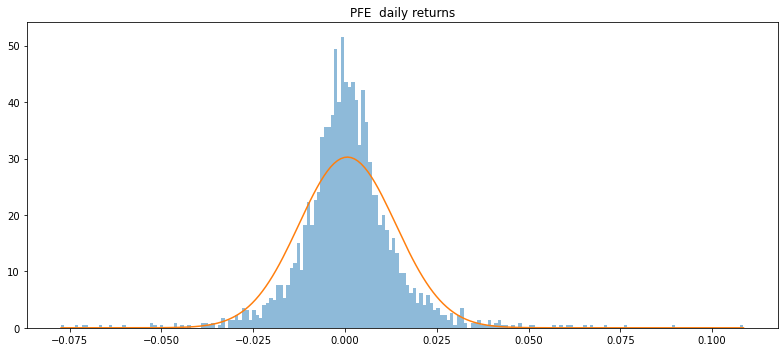

In [107]:
import scipy


for sym in returns.columns.values:
    _, bins, _ = plt.hist(returns[sym], 200, density=1, alpha=0.5)
    mu, sigma = scipy.stats.norm.fit(returns[sym])
    best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
    plt.plot(bins, best_fit_line)
    
    plt.title(f'{sym}  daily returns')
    plt.show()